## To run use greedyTSP(yourAdjacencyListHere)

In [1]:
import networkx as nx
import itertools
from networkx.algorithms import approximation as approx
import math
import numpy as np
import csv

# gets number of edges to create list of edges
def numberOfEdges(adjList, rows, cols):
    edgeCounter = 0
    for i in range(0, rows):
        for j in range(0, cols):
            if adjList[i][j] == 1 and i < j:
                edgeCounter = edgeCounter + 1
    
    return edgeCounter
                
# creates list of edges and adds weights to each
def createEdgeList(adjList, edgeList, edgeUpdates, edgeCounter, rows, cols):
    entries = 0
    for i in range(0, rows):
        for j in range(0, cols):
            if adjList[i][j] == 1 and i < j:
                edgeUpdates[i,j] = {'weight': 1}
                edgeList[entries][1] = j
                edgeList[entries][0] = i
                entries += 1
            elif adjList[i][j] == 0 and i < j:
                edgeUpdates[i,j] = {'weight': 99999}

# runs the greedy TSP algorithm on the adjacency matrix
def greedyTSP(adjList):
    rows, cols = (len(adjList), len(adjList[0]))
    edgeUpdates = {}
    edgeCounter = numberOfEdges(adjList, rows, cols)
    edgeList = [[0 for i in range(2)] for j in range(edgeCounter)]
    
    createEdgeList(adjList, edgeList, edgeUpdates, edgeCounter, rows, cols)
    
    cube = nx.Graph(incoming_graph_data=edgeList)
    nx.set_edge_attributes(cube, edgeUpdates)
    nx.draw(cube, with_labels = True)
    completeGraph = nx.complete_graph(rows, cube)
    nx.set_edge_attributes(completeGraph, edgeUpdates)
    
    path = approx.greedy_tsp(completeGraph, weight='weight')
    print(path[0:len(path)-1])


[0, 1, 2, 3, 7, 4, 5, 6]


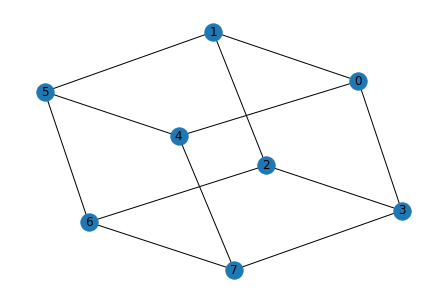

In [2]:
cubeAdjList = [[0,1,0,1,1,0,0,0],
              [1,0,1,0,0,1,0,0],
              [0,1,0,1,0,0,1,0],
              [1,0,1,0,0,0,0,1],
              [1,0,0,0,0,1,0,1],
              [0,1,0,0,1,0,1,0],
              [0,0,1,0,0,1,0,1],
              [0,0,0,1,1,0,1,0]]
greedyTSP(cubeAdjList)

[0, 1, 2, 3]


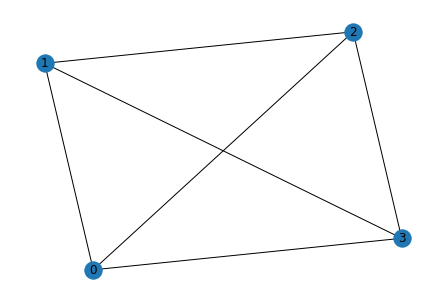

In [3]:
tetrahedron = [[0,1,1,1],
              [1,0,1,1],
              [1,1,0,1],
              [1,1,1,0]]
greedyTSP(tetrahedron)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

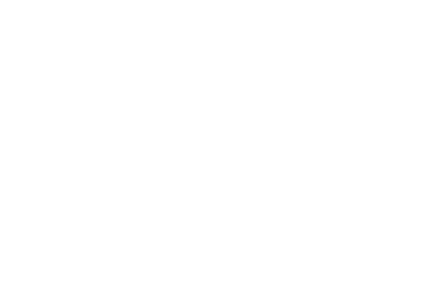

In [5]:
cell600 = list(csv.reader(open('CapstoneBinaryMatrix.csv')))
greedyTSP(cell600)